## Convolve Greyscale Image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

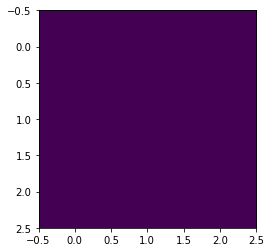

In [3]:
kernel = 1/9 * np.ones((3,3))
plt.imshow(kernel)

In [4]:

def convolve(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Convolve an image with a kernel assuming zero-padding of the image to handle the borders

    :param image: the image (either greyscale shape=(rows, cols) or colour shape=(rows, cols, channels))
    :type numpy.ndarray

    :param: kernel: the kernel (shape=(kheight, kwidth); both dimensions odd)
    :type: numpy.ndarray

    :returns the convolved image (of the same shape as the input image)
    :rtype numpy.ndarray
    """
    kern_count_row, kern_count_col = kernel.shape
    if (kern_count_row % 2) == 0:
        raise ValueError('Kernel cannot be an even dimension!')
    if (kern_count_col % 2) == 0:
        raise ValueError('Kernel cannot be an even dimension!')
    out = np.zeros_like(image)
    # width of padding is half the size of kernel

    pad_count_row = np.floor((kern_count_row/2)).astype(int)
    pad_count_col = np.floor((kern_count_col/2)).astype(int)

    image_padded = np.pad(image, (pad_count_row, pad_count_col), mode='constant')
    image_padded[pad_count_row:-pad_count_col, pad_count_col:-pad_count_row] = image

    # kernel application with sliding window
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            out[x,y]=(kernel * image_padded[x: x+kern_count_col, y: y+kern_count_row]).sum()

    return out

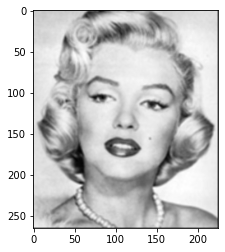

In [7]:
image = np.array(Image.open('data/marilyn.bmp').convert('L'))
conv_img = convolve(image, kernel)
plt.imshow(conv_img, cmap=plt.cm.gray)

## Convolve Colour Image

In [20]:
image = np.array(Image.open('data/marilyn.bmp'))
image.shape

(265, 225, 3)

(3, 3)


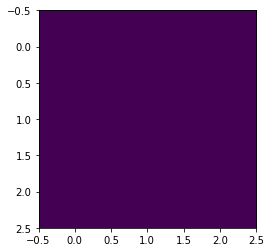

In [21]:
kernel = 1/9 * np.ones((3,3))
print(kernel.shape)
plt.imshow(kernel)

In [84]:
def convolve_colour(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Convolve an image with a kernel assuming zero-padding of the image to handle the borders

    :param image: the image (either greyscale shape=(rows, cols) or colour shape=(rows, cols, channels))
    :type numpy.ndarray

    :param: kernel: the kernel (shape=(kheight, kwidth); both dimensions odd)
    :type: numpy.ndarray

    :returns the convolved image (of the same shape as the input image)
    :rtype numpy.ndarray
    """
    kern_count_row, kern_count_col = kernel.shape
    if (kern_count_row % 2) == 0:
        raise ValueError('Kernel cannot be an even dimension!')
    if (kern_count_col % 2) == 0:
        raise ValueError('Kernel cannot be an even dimension!')
    out = np.zeros_like(image)
    # width of padding is half the size of kernel

    pad_count_row = np.floor((kern_count_row/2)).astype(int)
    pad_count_col = np.floor((kern_count_col/2)).astype(int)

    if image.ndim == 2:
        image_padded = np.pad(image, (pad_count_row, pad_count_col), mode='constant')
        image_padded[pad_count_row:-pad_count_col, pad_count_col:-pad_count_row] = image
        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                out[x,y]=(kernel * image_padded[x: x+kern_count_col, y: y+kern_count_row]).sum()
    elif image.ndim == 3:
        image_padded = np.pad(image, ((pad_count_row, pad_count_col),(pad_count_row, pad_count_col), (0,0)), mode='constant')
        image_padded[pad_count_row:-pad_count_col, pad_count_col:-pad_count_row] = image
        # kernel application with sliding window
        for z in range(image.shape[2]):
            for x in range(image.shape[0]):
                for y in range(image.shape[1]):
                        out[x,y,z]=(kernel * image_padded[x: x+kern_count_col, y: y+kern_count_row, z]).sum()
    return out

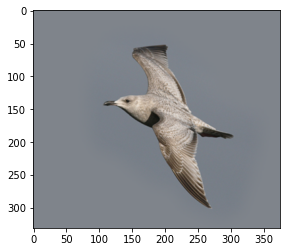

In [68]:
# test colour plt
bird = np.array(Image.open('data/bird.bmp'))
plt.imshow(bird)

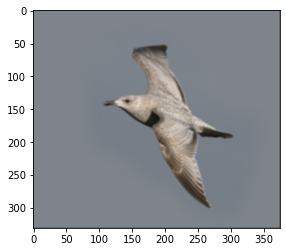

In [69]:
conv_bird = convolve_colour(bird, kernel)
plt.imshow(conv_bird)

2
ndim: 2


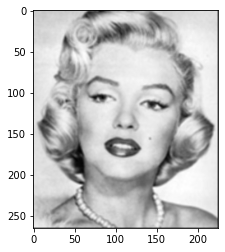

In [83]:
# test robustness
image = np.array(Image.open('data/marilyn.bmp').convert('L'))
print(image.ndim)
conv_img = convolve_colour(image, kernel)
plt.imshow(conv_img, cmap=plt.cm.gray)